In [24]:
import sys,os
import h5py
import pandas as pd
from datetime import datetime

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from wgpack.dportal import readDP_CTD, OxHz2DO, veh_list


In [28]:
vnam = 'sv3-1103'
vid = veh_list[vnam]
now = datetime.utcnow()

tw = 0.2
tst = now - pd.Timedelta(days=float(tw))
ten = now
print(ten.strftime("%Y-%m-%dT%H:%M:00.000Z"))
# vnam = 'sv3-253'
# tst = pd.to_datetime('2022-03-28 00:00:00')
# ten = pd.to_datetime('2022-03-29 00:00:00')

ctdDPdf = readDP_CTD(vid,
                     start_date=tst.strftime("%Y-%m-%dT%H:%M:00.000Z"),
                     end_date=ten.strftime("%Y-%m-%dT%H:%M:00.000Z"))
ctdDPdf

2022-09-19T21:48:00.000Z


IndexError: list index out of range

In [26]:
# Read in CTD data from Data Service
from pathlib import Path
# Data service path
ds_folder = os.path.join(str(Path.home()), 'src/lri-wgms-data-service')
if ds_folder not in sys.path:
    sys.path.insert(0, ds_folder)
from DataService import DataService
# instantiate data-service object
ds = DataService()
print(ds.report_list)

start_date = tst.strftime("%Y-%m-%dT%H:%M:%S.000Z")
end_date = ten.strftime("%Y-%m-%dT%H:%M:%S.000Z")
# ds.get_report_data('Telemetry 6 Report', start_date, end_date, [vnam])
# ds.get_report_data('Seabird CTD Records', start_date, end_date, [vnam])
ds.get_report_data('Seabird CTD Records with D.O.', start_date, end_date, [vnam])


['Raw Data Report', 'Telemetry 6 Report', 'Amps Power Summary Report', 'Amps Output Power Status Report', 'Amps Solar Input Port Report', 'Amps Battery Port Report', 'Amps Bridge Power Port Report', 'Telemetry 6 Report by WGMS Datetime', 'Raw Data Report by WGMS DateTime', 'Tracker Report', 'AIS Report', 'Vehicle Error Report', 'Data Usage Report', 'ADCP Bathymetry Samples', 'ADCP C2 Samples', 'ADCP C2T Samples', 'ADCP C4 Samples', 'ADCP C4T Samples', 'ADCP Header Samples', 'GPS Waves Energy Spectrum', 'GPS Waves Frequency Spectrum', 'GPS Waves Sensor', 'Seabird CTD Records', 'Weather Records 2', 'Fluorometer Samples 2', 'Winch Status', 'Generic Payload String', 'Vemco Vr2c Status', 'Vemco Vr2c Tags', 'Seabird CTD Records with D.O.', 'Seabird CTD Records without D.O.']


{'report_data': [{'vehicle_name': 'SV3-1103',
   'vehicle_id': 870143490,
   'vehicle_data': [{'timeStamp': '2022-09-19T20:55:23',
     'latitude': '55.5624233333333',
     'longitude': '-131.762251666667',
     'pressure (dbar)': -10.0,
     'temperature (degC)': -5.0,
     'conductivity (S/m)': -0.05,
     'oxygen (freq)': 0.0,
     'salinity (PSU)': 29.2996,
     'recordData': '140900006C9F0200784D050000000000'},
    {'timeStamp': '2022-09-19T20:55:24',
     'latitude': '55.5624233333333',
     'longitude': '-131.762251666667',
     'pressure (dbar)': -10.0,
     'temperature (degC)': -5.0,
     'conductivity (S/m)': -0.05,
     'oxygen (freq)': 4.951488123691741e-42,
     'salinity (PSU)': 29.3611,
     'recordData': '16090000E69F020065500500078A0000'},
    {'timeStamp': '2022-09-19T20:55:25',
     'latitude': '55.5624433333333',
     'longitude': '-131.762251666667',
     'pressure (dbar)': -10.0,
     'temperature (degC)': -5.0,
     'conductivity (S/m)': -0.05,
     'oxygen (fre

""


In [27]:
from datetime import datetime
vnam = 'sv3-1103'
tw = '0.1'
now = datetime.utcnow()
tst = now - pd.Timedelta(days=float(tw))
# tst = pd.to_datetime('2022-08-05 23:00:00')
# ten = pd.to_datetime('2022-08-06 02:00:00')
start_date = tst.strftime("%Y-%m-%dT%H:%M:%S.000Z")
end_date = ten.strftime("%Y-%m-%dT%H:%M:%S.000Z")
# ds.get_report_data('Telemetry 6 Report', start_date, end_date, [vnam])
print(start_date)
print(end_date)
# ds.get_report_data('Seabird CTD Records without D.O.', start_date, end_date, [vnam])
out = ds.get_report_data('Seabird CTD Records with D.O.', start_date, end_date, [vnam])
# Convert to pandas dataframe
CTDdf = pd.json_normalize(out['report_data'][0]['vehicle_data'])
# set timeStamp column as datetimeindex
CTDdf.set_index(pd.DatetimeIndex(CTDdf['timeStamp'].values),inplace=True)
CTDdf.drop(columns=['timeStamp'], inplace=True)
# sort index
CTDdf.sort_index(inplace=True)
# drop recordData field
CTDdf.drop(columns=['recordData'], inplace=True)
# convert to float
CTDdf = CTDdf.astype(float)

CTDdf

2022-09-19T19:24:02.000Z
2022-09-19T21:47:41.000Z


,latitude,longitude,pressure (dbar),temperature (degC),conductivity (S/m),oxygen (freq),salinity (PSU)
2022-09-19 20:55:23,55.562423,-131.762252,-10.0,-5.0,-0.05,0.000000e+00,29.2996
2022-09-19 20:55:24,55.562423,-131.762252,-10.0,-5.0,-0.05,4.951488e-42,29.3611
2022-09-19 20:55:25,55.562443,-131.762252,-10.0,-5.0,-0.05,5.657602e-42,29.3561
2022-09-19 20:55:26,55.562443,-131.762252,-10.0,-5.0,-0.05,5.692355e-42,29.3657
2022-09-19 20:55:27,55.562443,-131.762252,-10.0,-5.0,-0.05,5.751770e-42,29.3600
...,...,...,...,...,...,...,...
2022-09-19 21:43:05,55.572727,-131.761105,-10.0,-5.0,-0.05,4.067409e-42,31.9506
2022-09-19 21:43:06,55.572727,-131.761105,-10.0,-5.0,-0.05,4.069651e-42,31.9193
2022-09-19 21:43:07,55.572727,-131.761105,-10.0,-5.0,-0.05,4.081842e-42,31.9347
2022-09-19 21:43:08,55.572727,-131.761105,-10.0,-5.0,-0.05,4.095015e-42,31.9107


In [83]:
def read_in_SBGPCTD(CTD_filepath):
    import gsw
    import pandas as pd
    from scipy import stats

    # read in SBGPCTD file     
    ctddf = pd.read_csv(CTD_filepath)

    # remove to all rows not containing data
    ctddf = ctddf[ctddf['CTDO']=='CTDO']
    # rename columns
    dftmp = pd.read_csv(CTD_filepath,header=0)
    og_columns = dftmp.columns
    zip_iterator = zip(ctddf.columns, og_columns)
    columns_mapper = dict(zip_iterator)
    ctddf.rename(columns=columns_mapper,inplace=True)
    # set date as index
    ctddf.set_index(pd.to_datetime(ctddf['Date'] + ' ' + ctddf['Time']),inplace=True)
    ctddf.drop(columns=['CTDO','Date','Time','Millisec'],inplace=True)
    #     ctddf.drop(columns=['CTDO','Date','Millisec'],inplace=True)
    #     ctddf.set_index('Time',inplace=True)
    # rename columns again to match Data Portal output
    col_old = ['Latitude', 'Longitude', 'Conductivity(S/m)', 'Temperature(C)','Pressure(decibars)', 'Oxygen(Hz)']
    col_new = ['latitude', 'longitude','conductivity','temperature','pressure','oxygenHz']
    zip_iterator = zip(col_old,col_new )
    columns_mapper = dict(zip_iterator)
    ctdDPdf = ctddf.rename(columns=columns_mapper)
    ctdDPdf['salinity']=np.nan
    ctdDPdf['dissolvedOxygen']=np.nan
    ctdDPdf['oxygenSolubility']=np.nan
    ctdDPdf['DO (ml/L)']=np.nan
    ctdDPdf['DO (muM/kg)']=np.nan
    # convert to float values
    ctdDPdf['latitude'] = ctdDPdf['latitude'].astype(float)
    ctdDPdf['longitude'] = ctdDPdf['longitude'].astype(float)
    ctdDPdf['conductivity'] = ctdDPdf['conductivity'].astype(float)
    ctdDPdf['temperature'] = ctdDPdf['temperature'].astype(float)
    ctdDPdf['pressure'] = ctdDPdf['pressure'].astype(float)
    # Remove outliers     
    ctdDPdf['conductivity'][np.abs(stats.zscore(ctdDPdf['conductivity'])>4)]=np.nan
    ctdDPdf['temperature'][np.abs(stats.zscore(ctdDPdf['temperature'])>4)]=np.nan
    # Compute salinity
    # Reference: https://teos-10.github.io/GSW-Python/conversions.html
    C = ctdDPdf['conductivity'].values*10 # Conductivity, mS/cm
    t = ctdDPdf['temperature'].values     # In-situ temperature (ITS-90), degrees C
    p = ctdDPdf['pressure'].values        # Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    ctdDPdf['salinity'] = gsw.conversions.SP_from_C(C,t,p)
    
    return ctdDPdf

In [85]:
# CTDdfo = pd.read_csv('/Users/a1amador/data/WAVEGLIDER/sv3-1103/XDATA/SBGPCTD/SBGPCTD.CSV', skiprows=0)
# CTDdfo = CTDdfo[4:]
CTDdfo = read_in_SBGPCTD('/Users/a1amador/data/WAVEGLIDER/sv3-1103/XDATA/SBGPCTD/SBGPCTD.CSV')
CTDdfo


/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_43520/139771775.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctdDPdf['conductivity'][np.abs(stats.zscore(ctdDPdf['conductivity'])>4)]=np.nan
/var/folders/v3/hjbc_n5s6pxb64gmhz1t6rcc0000gp/T/ipykernel_43520/139771775.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctdDPdf['temperature'][np.abs(stats.zscore(ctdDPdf['temperature'])>4)]=np.nan


,latitude,longitude,conductivity,temperature,pressure,oxygenHz,salinity,dissolvedOxygen,oxygenSolubility,DO (ml/L),DO (muM/kg)
2022-08-05 22:57:56,32.884023,-117.291439,3.89780,12.5723,20.54,3075.81,33.480233,NaN,NaN,NaN,NaN
2022-08-05 22:57:57,32.884023,-117.291439,3.90158,12.6189,20.15,3077.50,33.475108,NaN,NaN,NaN,NaN
2022-08-05 22:58:10,32.884054,-117.291483,3.90451,12.6477,20.15,3079.22\r\n,33.477514,NaN,NaN,NaN,NaN
2022-08-05 22:58:11,32.884054,-117.291483,3.89551,12.5589,20.41,3079.60,33.470284,NaN,NaN,NaN,NaN
2022-08-05 22:58:12,32.884054,-117.291483,3.89570,12.5517,20.19,3088.61,33.478606,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-06 01:05:25,32.886794,-117.304139,3.79427,11.3393,45.52,2760.21,33.573487,NaN,NaN,NaN,NaN
2022-08-06 01:05:26,32.886794,-117.304139,3.79564,11.3548,45.49,2766.24,33.572901,NaN,NaN,NaN,NaN
2022-08-06 01:05:27,32.886794,-117.304139,3.79499,11.3541,45.22,2770.94,33.567249,NaN,NaN,NaN,NaN
2022-08-06 01:05:28,32.886794,-117.304139,3.79699,11.3580,45.05,2771.95,33.583482,NaN,NaN,NaN,NaN


Text(0.5, 0, 'time Aug 5-6 2022 [UTC]')

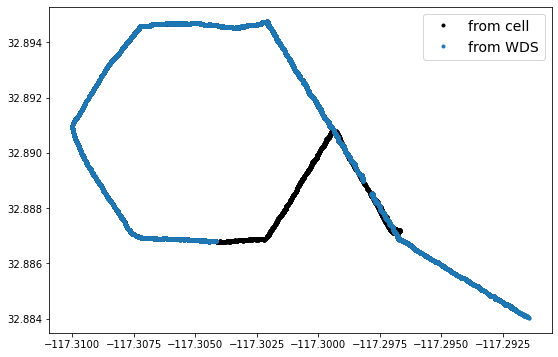

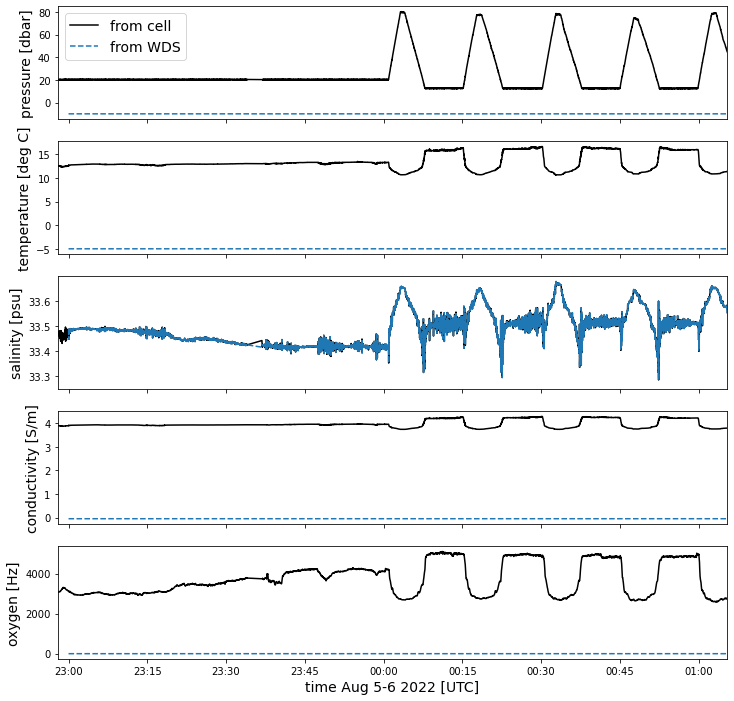

In [126]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fntsz = 14

fig, ax = plt.subplots(1,1,figsize=(9,6),sharex=True)
# plt.plot(CTDdf['longitude'].astype(float),CTDdf['latitude'].astype(float),'.')
plt.plot(CTDdf['longitude'].values,CTDdf['latitude'].values,'.k',label='from cell')
plt.plot(CTDdfo['longitude'].values,CTDdfo['latitude'].values,'.',label='from WDS')
plt.legend(fontsize=fntsz)

fig, ax = plt.subplots(5,1,figsize=(12,12),sharex=True)

ax[0].plot(CTDdfo['pressure'],'k',label='from cell')
ax[0].plot(CTDdf['pressure (dbar)'],'--',label='from WDS')
ax[0].set_ylabel('pressure [dbar]',fontsize=fntsz)
ax[0].legend(fontsize=fntsz)

ax[1].plot(CTDdfo['temperature'],'k')
ax[1].plot(CTDdf['temperature (degC)'],'--')
ax[1].set_ylabel('temperature [deg C]',fontsize=fntsz)

ax[2].plot(CTDdfo['salinity'],'k')
ax[2].plot(CTDdf['salinity (PSU)'],'--')
# ax[2].plot(CTDdfo['conductivity'],'k')
# ax[2].plot(CTDdf['conductivity (S/m)'],'--')
ax[2].set_ylabel('salinity [psu]',fontsize=fntsz)

ax[3].plot(CTDdfo['conductivity'],'k')
ax[3].plot(CTDdf['conductivity (S/m)'],'--')
ax[3].set_ylabel('conductivity [S/m]',fontsize=fntsz)

ax[4].plot(CTDdfo['oxygenHz'].astype(float),'k')
ax[4].plot(CTDdf['oxygen (freq)'],'--')
ax[4].set_ylabel('oxygen [Hz]',fontsize=fntsz)


ax[4].set_xlim(CTDdfo.index[0],CTDdfo.index[-1])

# Define the date format
date_form = DateFormatter("%H:%M")
ax[4].xaxis.set_major_formatter(date_form)
ax[4].set_xlabel('time Aug 5-6 2022 [UTC]',fontsize=fntsz)
